# Lecture 5: Machine Learning Examples

http://scikit-learn.org
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib

This is not a Machine Learning course. The purpose here is to show how easy many relevant Data Science methods are in Python.

## Data sets and Data generators

In [1]:
# load a classical dataset
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
# Print description, features, and classes
print(iris.DESCR)
print(iris.data[:5])
print(iris.target[:5])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
# Artificial data generators (e.g binary classification)
artiset = datasets.make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2)
print(artiset)

(array([[ 0.02695705,  0.96851223,  2.09555044, ..., -1.34891666,
        -0.6855914 , -0.35874659],
       [-0.68195386,  1.04710953,  0.13099632, ...,  0.41269563,
         0.2235411 ,  0.64021713],
       [ 0.71316869,  1.76739258, -0.74994216, ..., -0.72668508,
         0.65113674,  0.49012399],
       ...,
       [ 0.0665973 , -0.60672295,  0.03241998, ...,  0.04335843,
         1.7250933 , -1.01326101],
       [-0.16666589,  1.41773568, -0.96953395, ..., -0.13226588,
         0.12594656,  1.15934271],
       [-0.50902602,  0.06197895, -0.00915726, ...,  0.53581084,
         1.42455223, -1.52267578]]), array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1

Using a small data set that can be generated and analysed quickly is ideal for prototyping your analysis implementation. And data with a known distribution/separation is good for debugging. 

## Machine Learning 101 Aside: k-fold cross-validation

In [3]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(iris):
    x_train, y_train = iris.data[train_index], iris.target[train_index]
    x_test, y_test = iris.data[test_index], iris.target[test_index]
    # Do your analysis/synthesis/classification/evaluation here
    # Typical result: score for each element in test set
# Now you have score for all elements without direct overfitting

# See elements/labels in training and test set from final iteration
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[5.1 3.5 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
[0 0 0 0 0]
[[4.9 3.  1.4 0.2]]
[0]


... if you are a PhD student and want to try this, sign up for our Machine Learning and Imaging Methods course in May!

## Classification: Bayes

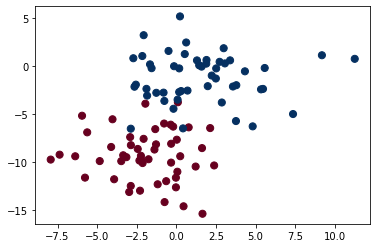

In [5]:
# Example gaussian naive bayes
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=2.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
plt.show()

A fast way to create a simple model is to assume that the data is described by a 
Gaussian distribution with no covariance between dimensions. This model can be fit by simply 
finding the mean and standard deviation of the points within each label, which is all you need 
to define such a distribution. 

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

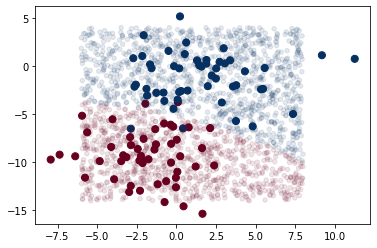

In [7]:
# Generating new data and predict label
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);
plt.show()

Instead of going directly for predicted labels (as above), we can get posterior probabilites:

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

How about using other classifiers? LDA, SVM, RF, ...

## Multi-class Problems

In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Note that fetch_20newsgroups has stored the data locally already above. For simplicity only a few categories are chosen for the analysis below.

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



## Generating text features and classify with multi-class Bayes

We can also analyze "non-measurement" data. The sklearn.feature_extraction.text.TfidfVectorizer function extract text features that can then be treated as numerical data. For the classification, we use a multi-class Bayes classifier.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import itertools

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)
posts = model.predict_proba(test.data)
print(labels[:5])
print(posts[:5,:])

[2 0 1 0 1]
[[0.03203008 0.06426687 0.69667014 0.2070329 ]
 [0.49658617 0.20448588 0.24348141 0.05544654]
 [0.01898103 0.91767761 0.05099168 0.01234967]
 [0.89750031 0.04846739 0.04550506 0.00852724]
 [0.02776492 0.52215396 0.42005053 0.03003059]]


To visualize the classification results, we use a more elegant visualization of the classical confusion matrix (below). Note the use of """ in the first line below the header. This starts+ends a multi-line description text and this text is then displayed using help().  

In [11]:
#function to plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=60)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
help(plot_confusion_matrix)

Help on function plot_confusion_matrix in module __main__:

plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x00000195E966BD08>)
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.



Now, on to the actual analysis. We first generate and visualize the confusion matrix. 

Confusion matrix, without normalization
[[344  13  32   0]
 [  6 364  24   0]
 [  1   5 392   0]
 [  4  12 187  48]]


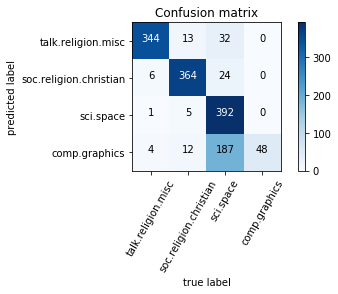

In [13]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
mat = confusion_matrix(test.target, labels)
plot_confusion_matrix(mat, classes=categories, title='Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()


Then we compute accuracy:

In [14]:
# Performance metric: Accuracy
from sklearn import metrics
acc = metrics.accuracy_score(labels, test.target)
print("The accuracy is " + str(acc.round(3)))

The accuracy is 0.802


## Unsupervised Learning: k-means clustering

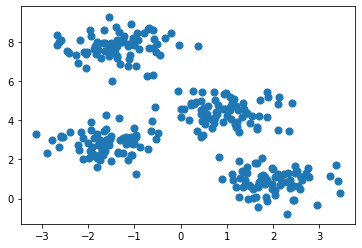

In [16]:
# Generate some artificial data clusters
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

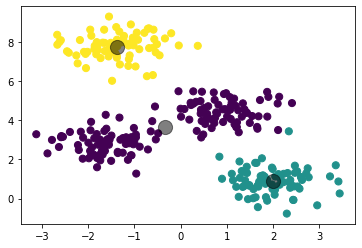

In [17]:
# k-means fit
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizing the estimated clusters.
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

## Linear Regression

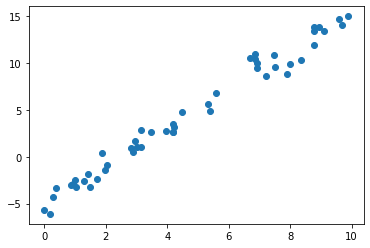

In [18]:
# Generate artificial example: random line points with noise
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);
plt.show()

(50,)
(50,)


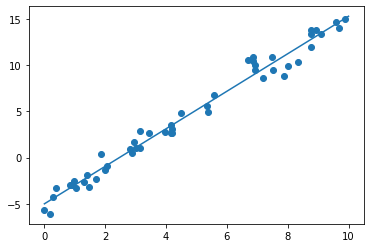

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


In [19]:
# Fitting a line
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

print(x.shape)
print(y.shape)

model.fit(x[:, np.newaxis], y)

# Sample test points and fit them to model
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
